In [15]:
import pandas as pd

# Path to the Excel file
excel_file_path = '/home/kumaripinki/Homestays_Data.xlsx'

# Load the Excel file into a DataFrame
data = pd.read_excel(excel_file_path)

# Specify the path where the CSV file should be saved
csv_file_path = '/home/kumaripinki/Homestays_Data.csv'

# Save the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)


In [33]:
# Data cleaning

import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/home/kumaripinki/Homestays_Data.csv')



In [28]:
# # Check for null values and fill or drop them
# data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
# data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
# data['beds'].fillna(data['beds'].median(), inplace=True)
# data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)
# data.dropna(subset=['thumbnail_url'], inplace=True)  # Assuming thumbnail URL is crucial


In [35]:
# Map 't'/'f' strings to integers (1 for 't' and 0 for 'f')
bool_map = {'t': 1, 'f': 0}
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    if data[col].dtype == object:
        data[col] = data[col].map(bool_map).astype(int)

# Proceed with other data transformations


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# One-Hot Encoding for categorical columns
categorical_cols = ['bed_type', 'cancellation_policy', 'neighbourhood', 'zipcode']
data = pd.get_dummies(data, columns=categorical_cols)

# Convert boolean columns to integers
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
data[bool_cols] = data[bool_cols].astype(int)

# Drop text columns (if not needed)
text_cols = ['description', 'name', 'amenities']
data = data.drop(columns=text_cols)

# Convert date columns to numeric by calculating the number of days from today
date_cols = ['first_review', 'last_review', 'host_since']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    data[col] = (datetime.now() - data[col]).dt.days

# Convert 'thumbnail_url' to a binary column
data['has_thumbnail'] = data['thumbnail_url'].notna().astype(int)
data = data.drop(columns=['thumbnail_url'])

# Assuming 'coordinates' are in the format "Point(longitude latitude)"
# Extract longitude and latitude if 'coordinates' are stored in a complex object format
if 'coordinates' in data.columns:
    data['latitude'] = data['coordinates'].apply(lambda x: float(x.split()[1].strip(')')) if pd.notna(x) else np.nan)
    data['longitude'] = data['coordinates'].apply(lambda x: float(x.split()[0].strip('Point(')) if pd.notna(x) else np.nan)
    data = data.drop(columns=['coordinates'])

# Now all columns should be numeric or have been properly encoded
print(data.info())

id: A unique identifier for each listing.
log_price: The logarithm of the rental price, which is the target variable for prediction.
property_type: The type of property (e.g., Apartment, House).
room_type: The category of room offered (e.g., Entire home/apt).
amenities: A set of amenities provided with the listing, formatted as a JSON-like string.
accommodates: The number of people the property accommodates.
bathrooms: The number of bathrooms.
bed_type: The type of bed available.
cancellation_policy: The cancellation policy applicable to the listing.
cleaning_fee: Boolean indicating whether a cleaning fee is charged.
latitude and longitude: Geographical coordinates of the listing.
name: A name or title for the listing.
neighbourhood: The neighborhood in which the listing is located.
number_of_reviews: The total number of reviews the listing has received.
review_scores_rating: Average review score rating out of 100.
thumbnail_url: URL to a thumbnail image of the listing.
zipcode: The postal code location of the listing.
bedrooms: Number of bedrooms.
beds: Number of beds available.

In [17]:
#1.feature engineering
import pandas as pd
from datetime import datetime

data['host_since'] = pd.to_datetime(data['host_since'])
data['last_review'] = pd.to_datetime(data['last_review'])
data['Host_Tenure'] = data['host_since'].apply(lambda x: (datetime.now() - x).days // 365)
data['Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')))
data['Days_Since_Last_Review'] = data['last_review'].apply(lambda x: (datetime.now() - x).days)

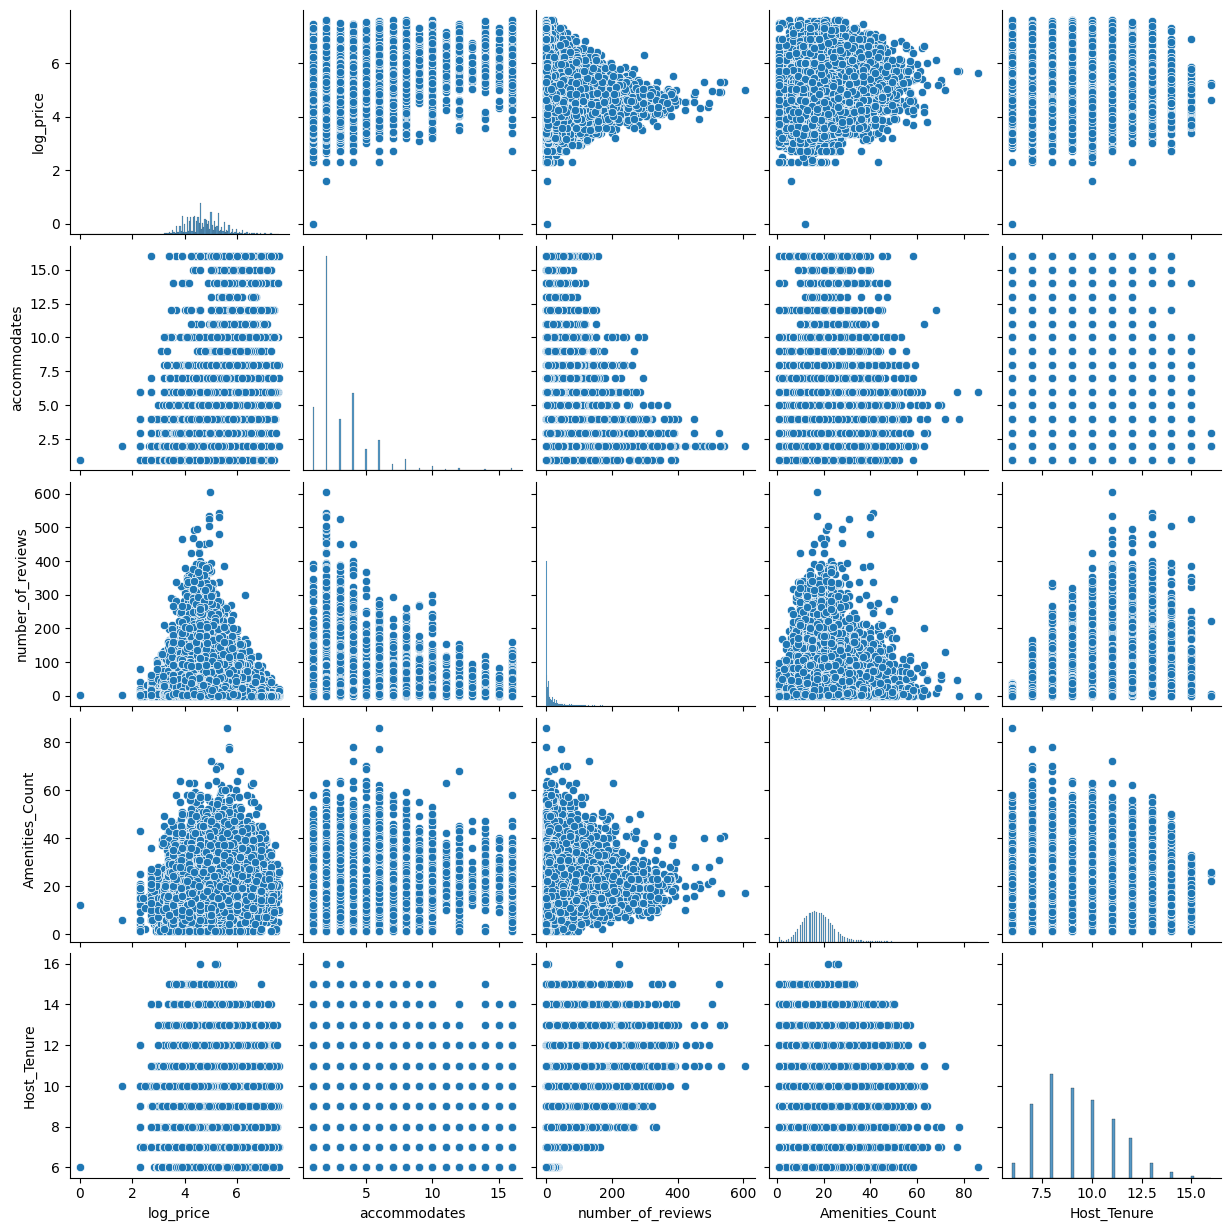

In [18]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['log_price', 'accommodates', 'number_of_reviews', 'Amenities_Count', 'Host_Tenure']])
plt.show()

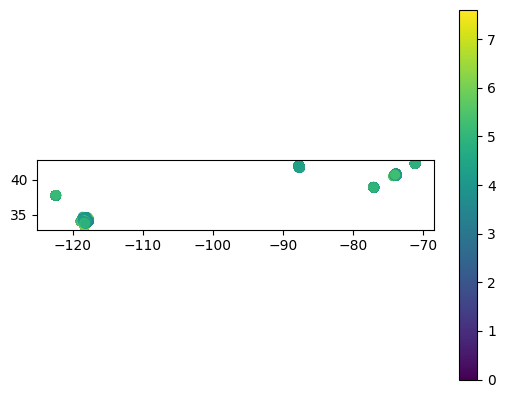

In [19]:
# Geospatial Analysis:

import geopandas as gpd
from shapely.geometry import Point

data['coordinates'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
geo_data = gpd.GeoDataFrame(data, geometry='coordinates')
geo_data.plot(column='log_price', cmap='viridis', legend=True)
plt.show()

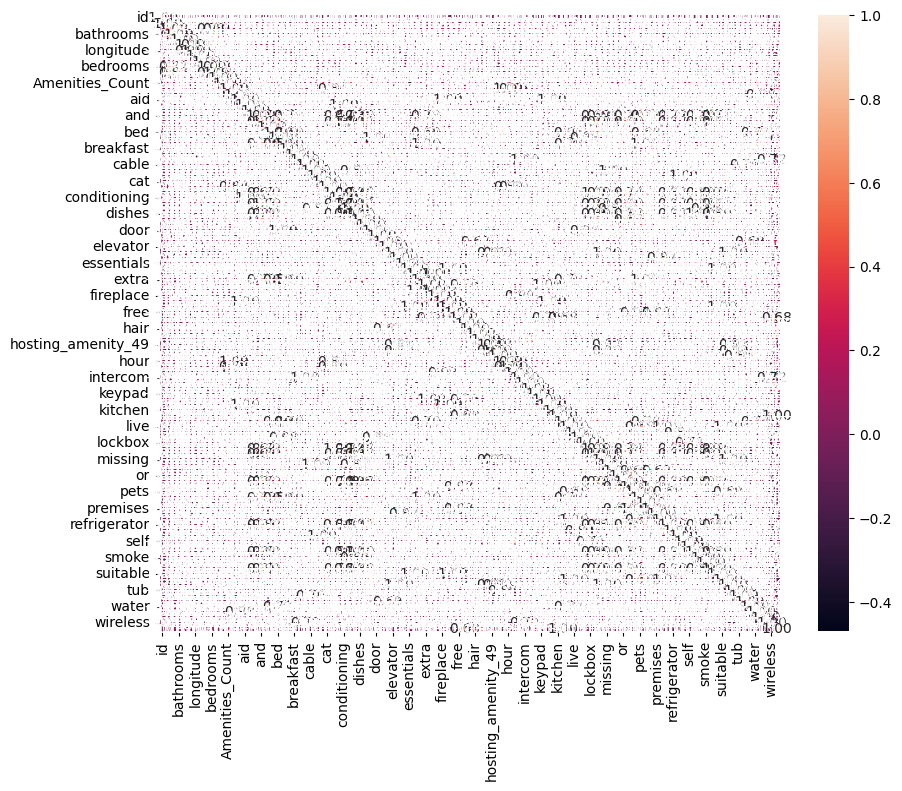

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


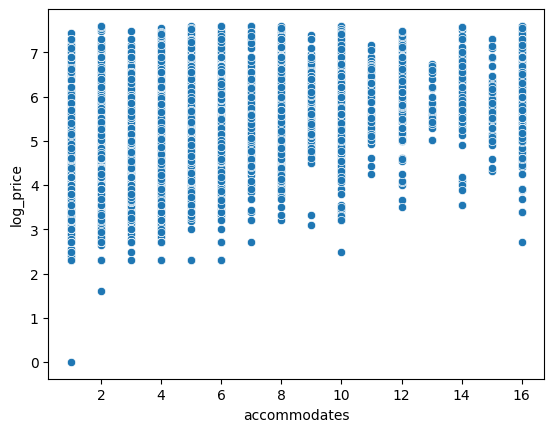

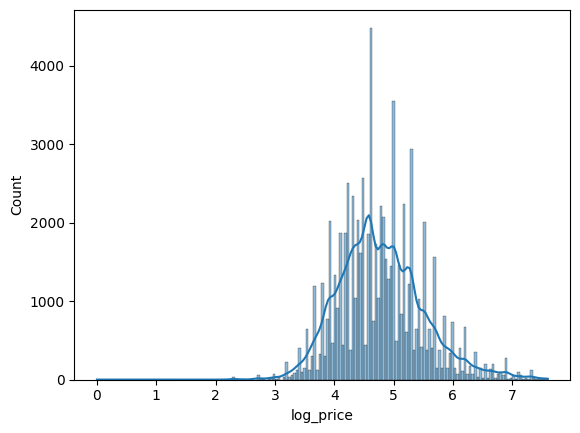

In [13]:
# Scatter plot
sns.scatterplot(x=data['accommodates'], y=data['log_price'])
plt.show()

# Histogram
sns.histplot(data['log_price'], kde=True)
plt.show()

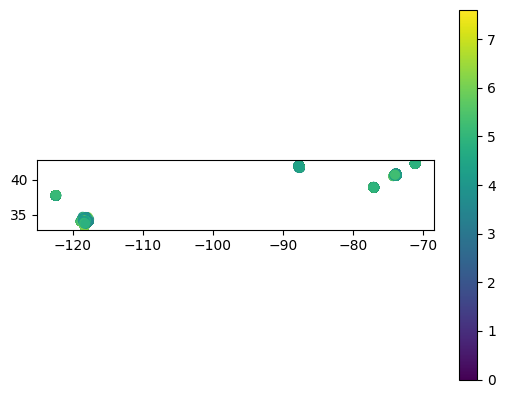

In [14]:
# 3. Geospatial Analysis
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'data' has correct data types for latitude and longitude
data['coordinates'] = data.apply(lambda row: Point(float(row['longitude']), float(row['latitude'])), axis=1)
geo_data = gpd.GeoDataFrame(data, geometry='coordinates')

# Plotting
geo_data.plot(column='log_price', legend=True, cmap='viridis')  # Adding a color map for better visualization
plt.show()

In [20]:
# 4. Sentiment Analysis on Textual Data
from textblob import TextBlob
# Ensure that 'description' is a string and handle NaNs
data['description'] = data['description'].fillna('No description').astype(str)

# Calculate sentiment polarity
data['description_sentiment'] = data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the output
print(data[['description', 'description_sentiment']].head())


                                         description  description_sentiment
0  Beautiful, sunlit brownstone 1-bedroom in the ...               0.716667
1  Enjoy travelling during your stay in Manhattan...               0.250000
2  The Oasis comes complete with a full backyard ...               0.274085
3  This light-filled home-away-from-home is super...               0.281515
5  Beautiful private room overlooking scenic view...               0.292143


In [21]:
# 5. Amenities Analysis:

from scipy.stats import pearsonr

for amenity in data.columns[data.columns.str.contains('amenity_')]:
    correlation, _ = pearsonr(data[amenity], data['log_price'])
    print(f'Correlation between {amenity} and log_price: {correlation}')


In [22]:
# 6.Categorical Data Encoding:
data = pd.get_dummies(data, columns=['room_type', 'city', 'property_type'])

In [24]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number, 'boolean']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop or transform non-numeric columns (for demonstration, let's drop them)
data = data.drop(columns=non_numeric_columns)

# Check if there are any boolean columns and convert them to integers
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)


Non-numeric columns: Index(['amenities', 'bed_type', 'cancellation_policy', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode', 'coordinates'],
      dtype='object')


In [23]:
# 7. Model Development and Training:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data.drop('log_price', axis=1)
y = data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lin, squared=False)}')

# Train RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}')

# Train Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boosting RMSE: {mean_squared_error(y_test, y_pred_gb, squared=False)}')


ValueError: could not convert string to float: '{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Heating,"Smoke detector","Carbon monoxide detector",Essentials,"Lock on bedroom door",Hangers,Iron,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water","Bed linens","Extra pillows and blankets",Microwave,Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove}'

In [ ]:
# 8. Model Optimization and Validation:
from sklearn.model_selection import GridSearchCV

# Grid search for RandomForest
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
print(f'Best parameters for RandomForest: {grid_rf.best_params_}')

# Grid search for Gradient Boosting
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
print(f'Best parameters for Gradient Boosting: {grid_gb.best_params_}')

In [ ]:
# 9. Feature Importance and Model Insights:
import shap

# Explain model's predictions using SHAP
explainer = shap.TreeExplainer(grid_rf.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# 10. Predictive Performance Assessment:
# Evaluate models using RMSE and R-squared
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f'Random Forest RMSE: {mean_squared_error(y_test, y_pred_best_rf, squared=False)}')
print(f'Random Forest R-squared: {r2_score(y_test, y_pred_best_rf)}')

best_gb = grid_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)
print(f'Gradient Boosting RMSE: {mean_squared_error(y_test, y_pred_best_gb, squared=False)}')
print(f'Gradient Boosting R-squared: {r2_score(y_test, y_pred_best_gb)}')